In [40]:
# EmailSpamDetection-SpamBase

'''This project is a machine learning-based email spam classifier that uses the SpamBase dataset for
   training and testing. The goal of this project is to build a model that can classify emails as either
   "spam" or "not spam" based on various features such as word frequency, character frequency, and more.
'''

'This project is a machine learning-based email spam classifier that uses the SpamBase dataset for \n   training and testing. The goal of this project is to build a model that can classify emails as either \n   "spam" or "not spam" based on various features such as word frequency, character frequency, and more.\n'

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [3]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [4]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [5]:
X.shape

(4601, 57)

In [6]:
y.shape

(4601, 1)

In [7]:
import pandas as pd

combined_df = X.copy()
combined_df['target'] = y
combined_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


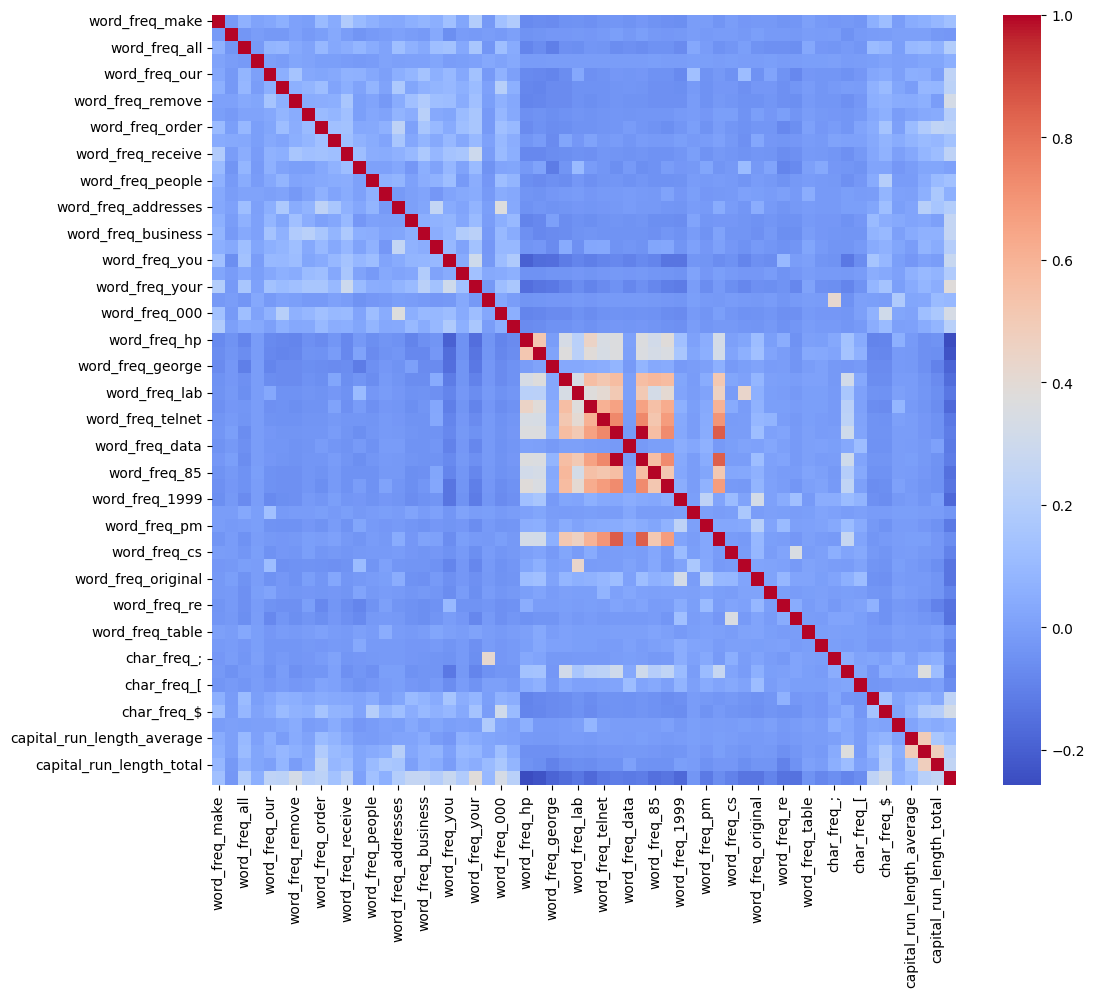

In [8]:
# Correlation Analysis
# Calculate the correlation between each feature and the class label (spam).
# Features with higher absolute correlation values (positive or negative) are more influential.

# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlations = combined_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

In [9]:
# Feature extraction with Tree-Based Models
# Use tree-based models like Random Forest or Gradient Boosting.
# These models provide feature importance scores, indicating the influence of each feature on the target variable.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

for index in sorted_indices:

  print(f"Feature: {index} {combined_df.columns[index]} - Importance: {feature_importances[index]}")



<ipython-input-9-93a7827d1eeb>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


Feature: 51 char_freq_! - Importance: 0.11995593963901433
Feature: 52 char_freq_$ - Importance: 0.08650982514532586
Feature: 6 word_freq_remove - Importance: 0.08347288514034457
Feature: 15 word_freq_free - Importance: 0.06934804920993252
Feature: 54 capital_run_length_average - Importance: 0.06363610446434656
Feature: 20 word_freq_your - Importance: 0.05599071709084233
Feature: 55 capital_run_length_longest - Importance: 0.055380286210383024
Feature: 24 word_freq_hp - Importance: 0.04871013486529894
Feature: 56 capital_run_length_total - Importance: 0.04078990672397526
Feature: 18 word_freq_you - Importance: 0.036228120134520855
Feature: 23 word_freq_money - Importance: 0.03547201280897899
Feature: 4 word_freq_our - Importance: 0.03432286166500446
Feature: 26 word_freq_george - Importance: 0.02237649437091492
Feature: 45 word_freq_edu - Importance: 0.02096784230144696
Feature: 22 word_freq_000 - Importance: 0.020785309452112714
Feature: 25 word_freq_hpl - Importance: 0.015966773919228

In [10]:
# Recursive Feature Elimination (RFE)
# Use RFE with a machine learning algorithm to recursively eliminate less important features.
# The algorithm ranks features based on their importance and selects the top features.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model
model = LogisticRegression()
rfe   = RFE(model, n_features_to_select =1 )
fit   = rfe.fit(X, y)

# Print fit ranking
for i in range(len(fit.ranking_)):
  print(f"Feature: {i}: {combined_df.columns[i]} - Ranking: {fit.ranking_[i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Feature: 0: word_freq_make - Ranking: 38
Feature: 1: word_freq_address - Ranking: 45
Feature: 2: word_freq_all - Ranking: 41
Feature: 3: word_freq_3d - Ranking: 17
Feature: 4: word_freq_our - Ranking: 30
Feature: 5: word_freq_over - Ranking: 23
Feature: 6: word_freq_remove - Ranking: 2
Feature: 7: word_freq_internet - Ranking: 32
Feature: 8: word_freq_order - Ranking: 19
Feature: 9: word_freq_mail - Ranking: 47
Feature: 10: word_freq_receive - Ranking: 48
Feature: 11: word_freq_will - Ranking: 46
Feature: 12: word_freq_people - Ranking: 56
Feature: 13: word_freq_report - Ranking: 44
Feature: 14: word_freq_addresses - Ranking: 14
Feature: 15: word_freq_free - Ranking: 16
Feature: 16: word_freq_business - Ranking: 15
Feature: 17: word_freq_email - Ranking: 43
Feature: 18: word_freq_you - Ranking: 50
Feature: 19: word_freq_credit - Ranking: 7
Feature: 20: word_freq_your - Ranking: 39
Feature: 21: word_freq_font - Ranking: 37
Feature: 22: word_freq_000 - Ranking: 4
Feature: 23: word_freq_m

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


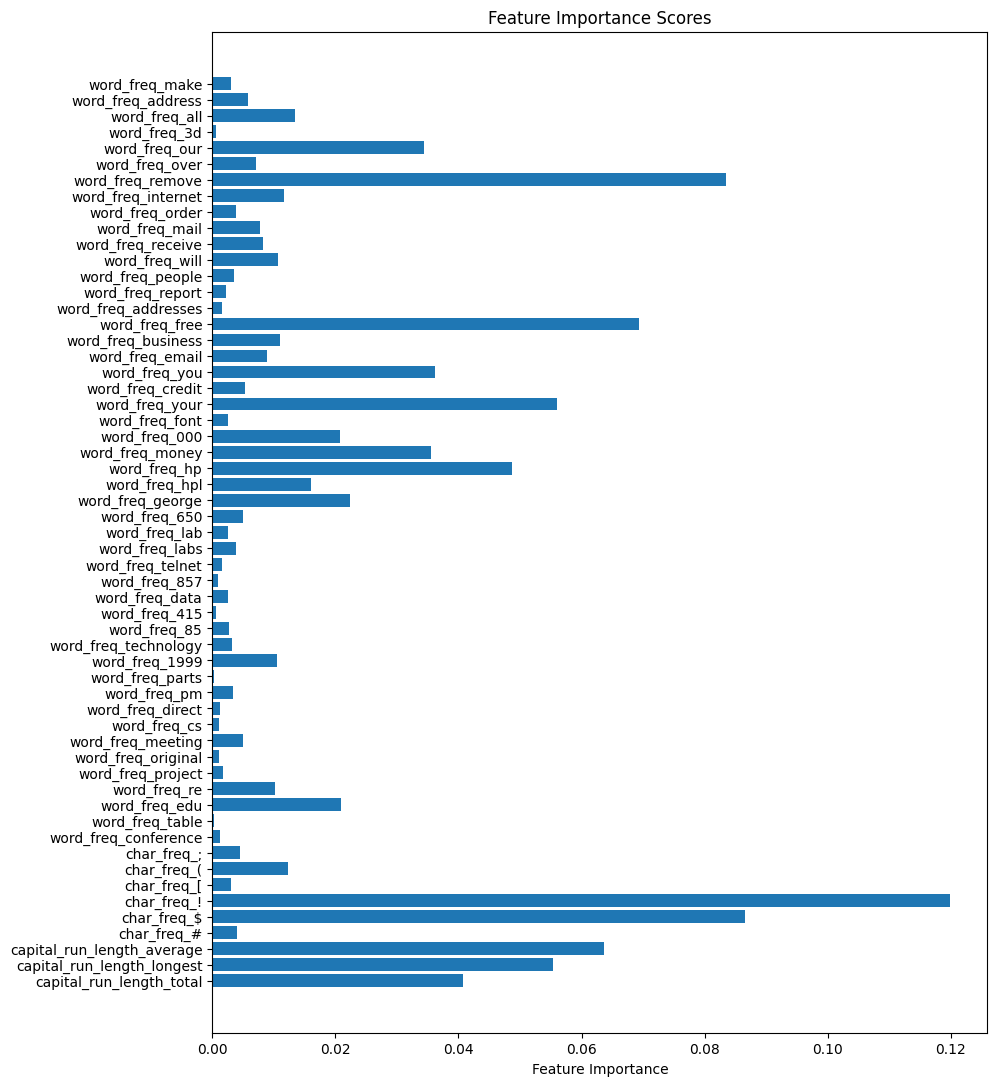

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# feature_importances = fit.ranking_ (from your RFE code)

# Create a list of feature names
feature_names = combined_df.columns[:-1]  # Exclude the target column

# Plot the histogram
plt.figure(figsize=(10, 13))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


In [14]:
# Feature Selection - selecting the most influential features

x_selected = combined_df[['char_freq_$', 'word_freq_remove', 'word_freq_000',  'char_freq_!', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'word_freq_hp', 'word_freq_free', 'word_freq_money', 'word_freq_your']]
x_selected

,char_freq_$,word_freq_remove,word_freq_000,char_freq_!,capital_run_length_average,capital_run_length_longest,capital_run_length_total,word_freq_hp,word_freq_free,word_freq_money,word_freq_your
0,0.000,0.00,0.00,0.778,3.756,61,278,0.0,0.32,0.00,0.96
1,0.180,0.21,0.43,0.372,5.114,101,1028,0.0,0.14,0.43,1.59
2,0.184,0.19,1.16,0.276,9.821,485,2259,0.0,0.06,0.06,0.51
3,0.000,0.31,0.00,0.137,3.537,40,191,0.0,0.31,0.00,0.31
4,0.000,0.31,0.00,0.135,3.537,40,191,0.0,0.31,0.00,0.31
...,...,...,...,...,...,...,...,...,...,...,...
4596,0.000,0.00,0.00,0.000,1.142,3,88,0.0,0.00,0.00,0.00
4597,0.000,0.00,0.00,0.353,1.555,4,14,0.0,0.00,0.00,2.00
4598,0.000,0.00,0.00,0.000,1.404,6,118,0.0,0.00,0.00,0.30
4599,0.000,0.00,0.00,0.000,1.147,5,78,0.0,0.00,0.00,0.32


In [15]:
# Check for null values

x_selected.isnull().sum()

char_freq_$                   0
word_freq_remove              0
word_freq_000                 0
char_freq_!                   0
capital_run_length_average    0
capital_run_length_longest    0
capital_run_length_total      0
word_freq_hp                  0
word_freq_free                0
word_freq_money               0
word_freq_your                0
dtype: int64

In [16]:
# Check for missing values

x_selected.isna().sum()

char_freq_$                   0
word_freq_remove              0
word_freq_000                 0
char_freq_!                   0
capital_run_length_average    0
capital_run_length_longest    0
capital_run_length_total      0
word_freq_hp                  0
word_freq_free                0
word_freq_money               0
word_freq_your                0
dtype: int64

In [18]:
# Splitting data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_selected,y, test_size= 0.3, random_state = 42)


In [23]:
# x_train.shape
# x_test.shape
# y_train.shape
# y_test.shape

(3220, 11)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [38]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
classf_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(classf_report)

Accuracy: 0.8747284576393918
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       804
           1       0.91      0.77      0.84       577

    accuracy                           0.87      1381
   macro avg       0.88      0.86      0.87      1381
weighted avg       0.88      0.87      0.87      1381

